<a href="https://colab.research.google.com/github/pitonic/AWS-Demos/blob/master/lab19/19_HW_Part2_Copy_of_Object_Detection_%D0%BD%D0%B0_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание**

part-1  [link here](https://colab.research.google.com/drive/1fdYFXObcq8Vmr3gLHc6VolwB_rXJoKEV?usp=sharing)

1. Возьмите произвольную базу для задачи обнаружения объектов (можно взять базу из занятия, можно разметить самостоятельно 20-30 изображений)
2. Обучите модель yolo размером "m" или более
3. Сохраните веса на google-диск

part-2
4. Создайте отдельный ноутбук, в котором установите TerraYolo
5. Протетсируйте работу yolo на тестовом изображении (без загрузки обученных весов)
6. Протестируйте работу yolo на тестовом изображении, указав путь к сохраненным ранее весам на google-диске



In [ ]:
# @title Libraries
%%capture
%pip install TerraYolo pillow==10.3

import os
import shutil
import random
import gdown
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from TerraYolo.TerraYolo import TerraYoloV5



In [ ]:
# @title Загрузка...
archive = gdown.download(url='https://storage.yandexcloud.net/terradev/terrayolo/cabin_data_1_classes.zip', output=None, fuzzy=True)

# Задание имени рабочего каталога
DATASET_DIR = '/content/dataset'

# Создание рабочего каталога
os.makedirs(DATASET_DIR, exist_ok=True)
shutil.rmtree('sample_data')

# Распаковка архива
shutil.unpack_archive(archive, DATASET_DIR)
print("Архив успешно разархивирован")

!mkdir /content/pic/
!cp /content/dataset/valid/images/13* /content/pic/

!rm -rf /content/dataset/

# Удаление архива
os.remove(archive)
print("Архив успешно удален")

Downloading...
From: https://storage.yandexcloud.net/terradev/terrayolo/cabin_data_1_classes.zip
To: /content/cabin_data_1_classes.zip
100%|██████████| 123M/123M [00:07<00:00, 15.8MB/s]


Архив успешно разархивирован
Архив успешно удален


In [ ]:
my_terra_yolov5 = TerraYoloV5(work_dir=DATASET_DIR)

In [ ]:
pic_list = '/content/pic/'

my_terra_yolov5 = TerraYoloV5(work_dir=DATASET_DIR)

test_dict = dict()
test_dict['source'] = pic_list
test_dict['conf'] = 0.5                                     # порог вероятности обнаружения объекта

my_terra_yolov5.run(test_dict, exp_type='test')


command python /content/dataset/yolov5/detect.py --source /content/pic/ --conf 0.5
detect: weights=dataset/yolov5/yolov5s.pt, source=/content/pic/, data=dataset/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=dataset/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-356-g2070b303 Python-3.10.12 torch-2.3.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 203MB/s]

Fusing layers...
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/6 /content/pic/132_jpg.rf.571492d58d199b8fcb7b62903090b122.jpg: 480x640 2 persons, 358.9ms
image 2/6 /content/pic/132_png.rf.b176c10f2fbc52aedf33ccb306710d0a.jpg: 480x640 1 person, 350.8ms
image

img_path /content/dataset/yolov5//runs/detect//exp


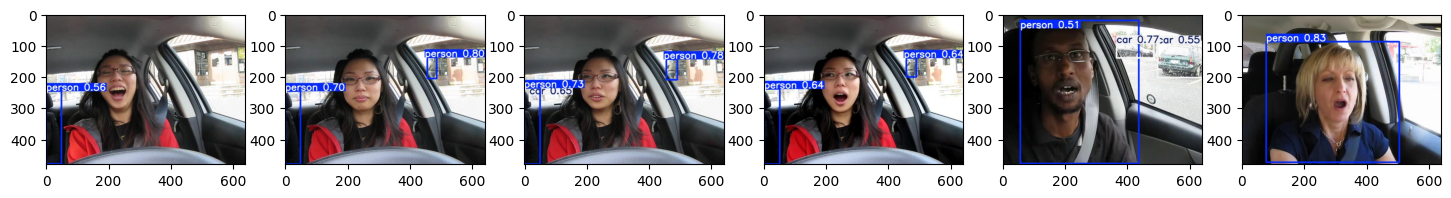

In [ ]:
my_terra_yolov5.show_test_images(n_samples=6 )

In [ ]:

from google.colab import drive # импорт модуля для работы с диском
drive.mount('/content/drive/') # монтируем свой диск в папку drive рабочего каталога


Mounted at /content/drive/


In [ ]:


pic_list = '/content/pic/'

my_terra_yolov5 = TerraYoloV5(work_dir=DATASET_DIR)


test_dict = dict()
test_dict['source'] = pic_list
test_dict['conf'] = 0.5                                     # порог вероятности обнаружения объекта
test_dict['weights'] = '/content/drive/MyDrive/yolo_weights/best.pt'


my_terra_yolov5.run(test_dict, exp_type='test')




command python /content/dataset/yolov5/detect.py --source /content/pic/ --conf 0.5 --weights /content/drive/MyDrive/yolo_weights/best.pt
detect: weights=['/content/drive/MyDrive/yolo_weights/best.pt'], source=/content/pic/, data=dataset/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=dataset/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-356-g2070b303 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers...
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/6 /content/pic/132_jpg.rf.571492d58d199b8fcb7b62903090b122.jpg: 480x640 1 head, 279.0ms
image 2/6 /content/pic/132_png.rf.b176c10f2fbc52aedf33ccb306710d0a.jpg: 480x640 1 hea

img_path /content/dataset/yolov5//runs/detect//exp2


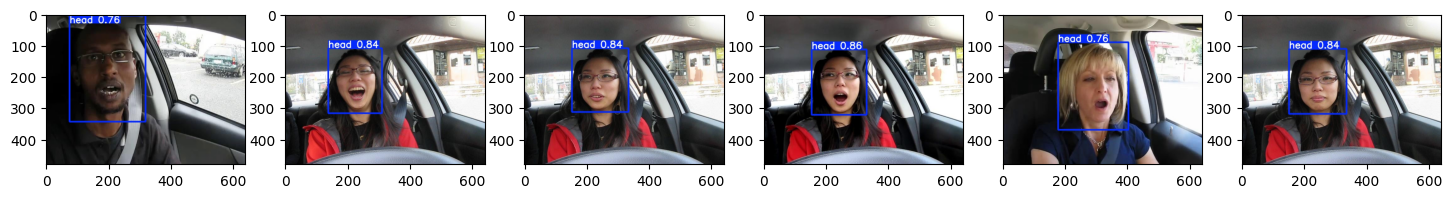

In [ ]:
my_terra_yolov5.show_test_images(n_samples=6)